# (Presentation Title)
## by (your name here)

## Investigation Overview

> Describe the overall goals of your presentation here.

## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
loans = pd.read_csv('engineered_loans_data.csv')

In [ ]:
while False:
    #loading dataset
    loans = pd.read_csv('prosperLoanData.csv')

    #feature engineering

    #remove top one percent of monthly income
    upper_percentile = loans.StatedMonthlyIncome.describe(np.arange(0,1,.01)).round(3).loc['99%']
    no_one_percenters = loans[loans['StatedMonthlyIncome'] < upper_percentile]

    #backing up loans dataset
    loans_c = loans.copy()

    #clean up the LoanStatus column so that all Past Due loans are now under one value. The past due day bins are moved 
    #to a second column.
    #putting the past due bin day groups into a separate column in case the value is later needed
    loans['PastDueBin'] = loans['LoanStatus'].apply(lambda x: x.split("(")[1][:-1] if len(x.split("(")) > 1 else np.nan)

    #removing the past due bin day groups from the LoanStatus column
    loans['LoanStatus'] = loans['LoanStatus'].apply(lambda x: x.split("(")[0].strip())

    #calculate Actual Loss Rate
    loans['ActualLossRate'] = loans.apply(lambda x: x['LP_GrossPrincipalLoss']/x['LoanOriginalAmount'] 
                                          if x['LoanStatus'] in ['Chargedoff','Defaulted'] else np.nan, axis=1)



> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

## (Visualization 2)

When looking at the PropserScore across each Loan type, the distribution appears normal and it does not seem like any one or range of ProsperScores is more represented in Past Due or Defaulted loans

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

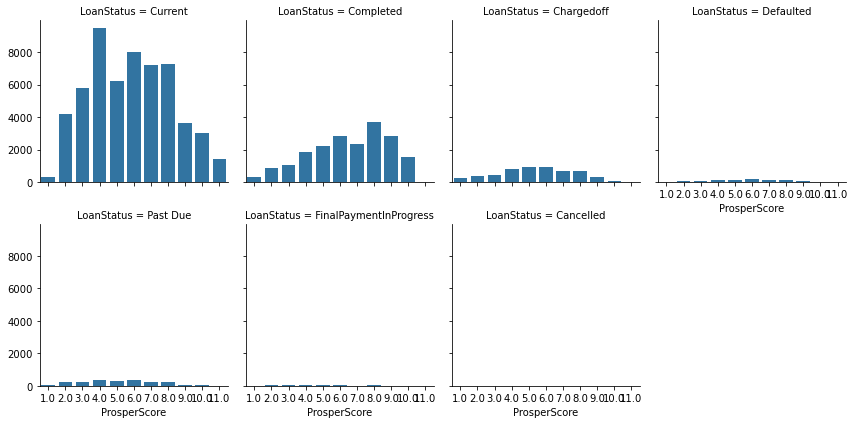

In [5]:
#facet bar plot with prosperscore and loanstatus

# Convert the "LoanStatus" column from a plain object type into an ordered categorical type
statuses = list(loans.LoanStatus.value_counts().index)
loan_statuses = pd.api.types.CategoricalDtype(ordered=False, categories=statuses)
loans['LoanStatus'] = loans['LoanStatus'].astype(loan_statuses)
score_order = list(loans.ProsperScore.value_counts().sort_index().index)

# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data = loans, col = 'LoanStatus', col_wrap=4, margin_titles = True)
g.map(sns.countplot, "ProsperScore", order=score_order);

## (Visualization 3)

Here rather than see the estimated loss, we can look at the Actual Loss Rate and compare it to the Debt to Income Ratio for each level of Prosper Score, a custom risk score. One aspect that can be immediately observed is that the correlation between the Debt to Income Ratio and the Actual Loss Rate goes from neutral with lower Propser Scores and turns negative with the high end of Prosper Scores, from 8 onward. This suggests the Prosper Score has viability in determining whether the loan may be paid back.

For Prosper Scores 8 to 10, even as the Debt to Income Ratio increased, the Actual Loss Rate did not increase. Unlike the Prosper Scores 1 to 3, where even with low Debt to Income Ratios, the Actual Loss Rates are generally still high. Though the correlation is neutral, we can see the concentration of data points is focused in high Actual Loss Rates even for low Debt to Income Ratios. As the Prosper Score increases, we see more data points in the low end of Actual Loss Rates, even as the correlation stays neutral.

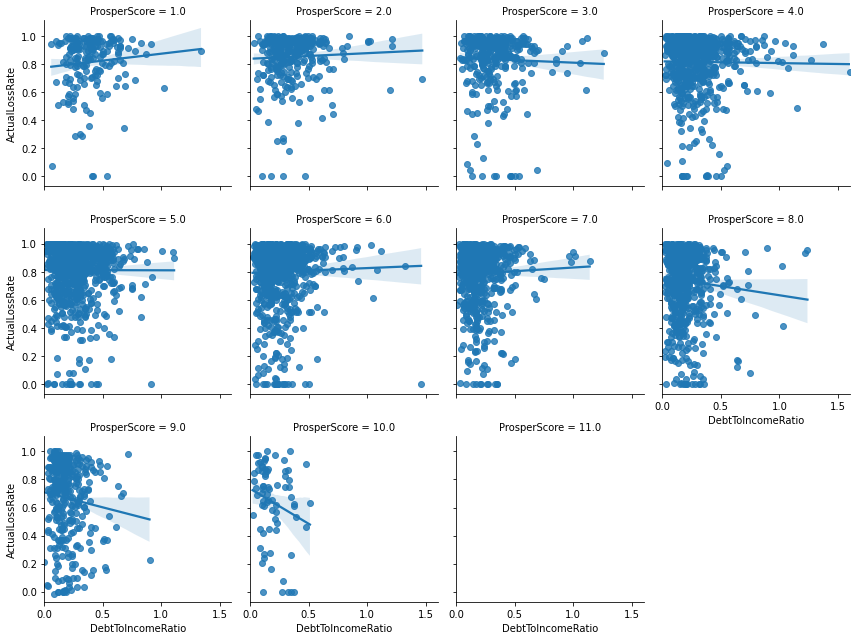

In [6]:
g = sns.FacetGrid(data = loans.query('DebtToIncomeRatio < 1.67'), col = 'ProsperScore', col_wrap=4, margin_titles=True)
g.map(sns.regplot, 'DebtToIncomeRatio', 'ActualLossRate');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!